In [ ]:
###Predictive Analytics And Recommendation Systems In Banking

In [1]:
#imports libraries
from faker import Faker
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
##Data Collection
##Generating synthetic data 

# Initialize Faker
fake = Faker()

# Define constants
LOAN_TYPES = ['Personal', 'Business', 'Education', 'Auto', 'Mortgage']
PRODUCT_NAMES = [
    'Savings Account', 'Checking Account', 'Credit Card', 'Personal Loan', 'Home Loan',
    'Auto Loan', 'Business Loan', 'Student Loan', 'Investment Fund', 'Retirement Plan',
    'Insurance Policy', 'Mutual Fund', 'Bond', 'Certificate of Deposit', 'Home Equity Line',
    'Mortgage Refinance', 'Business Credit Line', 'Auto Refinance', 'Home Improvement Loan',
    'Gold Loan', 'Cash Credit', 'Short-Term Loan', 'Long-Term Loan', 'Travel Loan',
    'Medical Loan', 'Emergency Loan', 'Holiday Loan', 'Debt Consolidation Loan', 'Small Business Loan',
    'Agricultural Loan', 'Technology Loan', 'Education Savings Plan', 'Wealth Management',
    'Stock Investment', 'Real Estate Investment', 'International Investment', 'Fixed Deposit',
    'Recurring Deposit', 'Loan Against Property', 'Gold Investment', 'Retirement Savings',
    'High-Yield Savings Account', 'Money Market Account', 'Insurance Savings', 'Pension Plan',
    'Child Education Fund', 'Healthcare Savings', 'Property Investment', 'Auto Insurance'
]

# Function to generate synthetic data
def generate_synthetic_data(n_records=1000, n_customers=100, n_products=50, csv_filename="simplified_dataset.csv"):
    data = []
    
    # Generate unique customer and product IDs
    customer_ids = [f"C0{i+1}" for i in range(n_customers)]
    product_ids = [f"P0{i+1}" for i in range(n_products)]
    
    # Map product IDs to names
    product_id_to_name = {product_ids[i]: PRODUCT_NAMES[i % len(PRODUCT_NAMES)] for i in range(n_products)}
    
    # Generate transaction frequency for each customer
    transaction_frequency = {cust_id: random.randint(1, 10) for cust_id in customer_ids}
    
    for _ in range(n_records):
        # Generate random customer and product details
        customer_id = random.choice(customer_ids)
        product_id = random.choice(product_ids)
        
        age = random.randint(18, 70)
        monthly_income = round(random.uniform(20_000, 200_000), 2)
        credit_score = random.randint(300, 850)
        loan_amount = round(random.uniform(100_000, 1_000_000), 2)
        interest_rate = round(random.uniform(1.0, 15.0), 2)
        loan_term = random.choice([12, 24, 36, 48, 60])
        loan_type = random.choice(LOAN_TYPES)
        transaction_id = fake.uuid4()
        gender = np.random.choice(["Male", "Female"])
        transaction_amount = round(random.uniform(5, 2000), 2)
        transaction_type = np.random.choice(["Deposit", "Withdrawal"])
        transaction_date = fake.date_between("-1y", "now")
        interaction_type = np.random.choice(["Purchased", "Viewed", "Clicked"])
        interaction_date = fake.date_between("-1y", "now")
        
        # Derived fields
        debt_income_ratio = loan_amount / monthly_income
        credit_score_band = (
            "Poor" if credit_score < 580 else
            "Fair" if credit_score < 670 else
            "Good" if credit_score < 740 else
            "Excellent"
        )
        default_probability = min(max((700 - credit_score) / 400 + (50_000 - monthly_income) / 100_000, 0.05), 0.95)
        repayment_status = np.random.binomial(1, default_probability)
        
        transaction_year = transaction_date.year
        transaction_month = transaction_date.month
        interaction_year = interaction_date.year
        interaction_day_name = interaction_date.strftime("%A")
        transaction_frequency_value = transaction_frequency[customer_id]
        
        # Append record
        data.append({
            "Customer_Id": customer_id,
            "Age": age,
            "Monthly_Income": monthly_income,
            "Credit_Score": credit_score,
            "Credit_Score_Band": credit_score_band,
            "Loan_Amount": loan_amount,
            "Interest_Rate": interest_rate,
            "Loan_Term": loan_term,
            "Loan_Type": loan_type,
            "Debt_Income_Ratio": debt_income_ratio,
            "Repayment_Status": repayment_status,
            "Transaction_Id": transaction_id,
            "Gender": gender,
            "Transaction_Amount": transaction_amount,
            "Transaction_Type": transaction_type,
            "Transaction_Date": transaction_date,
            "Transaction_Year": transaction_year,
            "Transaction_Month": transaction_month,
            "Product_Id": product_id,
            "Product_Name": product_id_to_name[product_id],
            "Interaction_Date": interaction_date,
            "Interaction_Year": interaction_year,
            "Interaction_Day_Name": interaction_day_name,
            "Interaction_Type": interaction_type,
            "Transaction_Frequency": transaction_frequency_value
        })
    
    # Save to CSV
    df = pd.DataFrame(data)
    df.to_csv(csv_filename, index=False)
    print(f"Data successfully saved to {csv_filename}")

# Generate data
generate_synthetic_data(n_records=1000, n_customers=100, n_products=50, csv_filename="simplified_dataset.csv")


Data successfully saved to simplified_dataset.csv


In [3]:
##Data Preprocessing
#load the dataset
df=pd.read_csv("D:/Final_project/simplified_dataset.csv")
df

Customer_Id  Age  Monthly_Income  Credit_Score Credit_Score_Band  \
0          C074   37       181981.92           740         Excellent   
1          C090   49        73119.27           363              Poor   
2          C068   36       115871.54           472              Poor   
3          C031   29        58724.38           662              Fair   
4           C08   39        87561.13           609              Fair   
..          ...  ...             ...           ...               ...   
995        C057   22       183137.63           665              Fair   
996        C012   69       193218.36           340              Poor   
997        C055   70       116834.72           348              Poor   
998        C071   43        65688.05           664              Fair   
999        C047   40       173075.14           561              Poor   

     Loan_Amount  Interest_Rate  Loan_Term  Loan_Type  Debt_Income_Ratio  ...  \
0      595211.63           3.46         24       Auto           3.270718  ...   
1      791138.45           3.88         12  Education          10.819835  ...   
2      602767.48           2.35         24   Mortgage           5.202032  ...   
3      263215.83           4.10         12       Auto           4.482224  ...   
4      662525.89           6.36         36  Education           7.566438  ...   
..           ...            ...        ...        ...                ...  ...   
995    101160.59           2.15         60   Mortgage           0.552375  ...   
996    476178.63          14.74         48   Mortgage           2.464459  ...   
997    978457.41           4.97         12   Business           8.374714  ...   
998    110451.95          11.58         12   Mortgage           1.681462  ...   
999    290349.99           2.75         48   Business           1.677595  ...   

     Transaction_Date Transaction_Year Transaction_Month  Product_Id  \
0          2024-04-04             2024                 4        P034   
1          2024-02-16             2024                 2        P049   
2          2024-08-28             2024                 8        P021   
3          2024-02-07             2024                 2        P023   
4          2024-12-13             2024                12        P035   
..                ...              ...               ...         ...   
995        2024-04-15             2024                 4        P039   
996        2024-06-20             2024                 6        P047   
997        2024-05-28             2024                 5        P017   
998        2024-09-07             2024                 9        P047   
999        2024-08-08             2024                 8        P047   

               Product_Name Interaction_Date  Interaction_Year  \
0          Stock Investment       2024-05-31              2024   
1            Auto Insurance       2024-05-18              2024   
2               Cash Credit       2024-12-07              2024   
3            Long-Term Loan       2024-11-23              2024   
4    Real Estate Investment       2024-10-16              2024   
..                      ...              ...               ...   
995   Loan Against Property       2024-06-04              2024   
996      Healthcare Savings       2024-04-13              2024   
997    Business Credit Line       2024-02-18              2024   
998      Healthcare Savings       2024-11-04              2024   
999      Healthcare Savings       2023-12-24              2023   

     Interaction_Day_Name Interaction_Type Transaction_Frequency  
0                  Friday           Viewed                     7  
1                Saturday           Viewed                     3  
2                Saturday          Clicked                     9  
3                Saturday           Viewed                     5  
4               Wednesday          Clicked                     8  
..                    ...              ...                   ...  
995               Tuesday          Clic

In [4]:
df.shape

(1000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Id            1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Monthly_Income         1000 non-null   float64
 3   Credit_Score           1000 non-null   int64  
 4   Credit_Score_Band      1000 non-null   object 
 5   Loan_Amount            1000 non-null   float64
 6   Interest_Rate          1000 non-null   float64
 7   Loan_Term              1000 non-null   int64  
 8   Loan_Type              1000 non-null   object 
 9   Debt_Income_Ratio      1000 non-null   float64
 10  Repayment_Status       1000 non-null   int64  
 11  Transaction_Id         1000 non-null   object 
 12  Gender                 1000 non-null   object 
 13  Transaction_Amount     1000 non-null   float64
 14  Transaction_Type       1000 non-null   object 
 15  Trans

In [6]:
df["Transaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Interaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Transaction_Year"]=df["Transaction_Year"].astype("category")
df["Transaction_Month"]=df["Transaction_Month"].astype("category")
df["Interaction_Year"]=df["Interaction_Year"].astype("category")
df[df.select_dtypes(include="object").columns]=df.select_dtypes(include="object").astype("category")

In [7]:
df.dtypes

Customer_Id                    category
Age                               int64
Monthly_Income                  float64
Credit_Score                      int64
Credit_Score_Band              category
Loan_Amount                     float64
Interest_Rate                   float64
Loan_Term                         int64
Loan_Type                      category
Debt_Income_Ratio               float64
Repayment_Status                  int64
Transaction_Id                 category
Gender                         category
Transaction_Amount              float64
Transaction_Type               category
Transaction_Date         datetime64[ns]
Transaction_Year               category
Transaction_Month              category
Product_Id                     category
Product_Name                   category
Interaction_Date         datetime64[ns]
Interaction_Year               category
Interaction_Day_Name           category
Interaction_Type               category
Transaction_Frequency             int64


In [8]:
df.isnull().sum()

Customer_Id              0
Age                      0
Monthly_Income           0
Credit_Score             0
Credit_Score_Band        0
Loan_Amount              0
Interest_Rate            0
Loan_Term                0
Loan_Type                0
Debt_Income_Ratio        0
Repayment_Status         0
Transaction_Id           0
Gender                   0
Transaction_Amount       0
Transaction_Type         0
Transaction_Date         0
Transaction_Year         0
Transaction_Month        0
Product_Id               0
Product_Name             0
Interaction_Date         0
Interaction_Year         0
Interaction_Day_Name     0
Interaction_Type         0
Transaction_Frequency    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

Age  Monthly_Income  Credit_Score    Loan_Amount  \
count  1000.000000     1000.000000   1000.000000    1000.000000   
mean     44.229000   110982.197030    575.104000  544547.715930   
min      18.000000    20066.720000    300.000000  101160.590000   
25%      31.000000    66591.030000    452.000000  323245.135000   
50%      44.500000   111666.100000    571.000000  530286.785000   
75%      58.000000   157613.495000    702.500000  773240.342500   
max      70.000000   199786.030000    850.000000  999854.940000   
std      15.443544    52180.291502    154.248266  262852.851862   

       Interest_Rate    Loan_Term  Debt_Income_Ratio  Repayment_Status  \
count    1000.000000  1000.000000        1000.000000       1000.000000   
mean        8.207860    35.376000           6.892640          0.152000   
min         1.020000    12.000000           0.537282          0.000000   
25%         4.792500    24.000000           2.978559          0.000000   
50%         8.380000    36.000000           4.847135          0.000000   
75%        11.665000    48.000000           8.109900          0.000000   
max        14.950000    60.000000          42.941660          1.000000   
std         4.022637    17.009996           6.393212          0.359201   

       Transaction_Amount               Transaction_Date  \
count         1000.000000                           1000   
mean           990.203770  2024-06-21 18:10:04.799999744   
min              6.500000            2023-12-21 00:00:00   
25%            500.145000            2024-03-20 00:00:00   
50%            993.425000            2024-06-25 00:00:00   
75%           1479.865000            2024-09-19 00:00:00   
max           1998.900000            2024-12-20 00:00:00   
std            572.387616                            NaN   

                    Interaction_Date  Transaction_Frequency  
count                           1000            1000.000000  
mean   2024-06-21 18:10:04.799999744               5.437000  
min              2023-12-21 00:00:00               1.000000  
25%              2024-03-20 00:00:00               3.000000  
50%              2024-06-25 00:00:00               5.000000  
75%              2024-09-19 00:00:00               8.000000  
max              2024-12-20 00:00:00              10.000000  
std                              NaN               2.724969

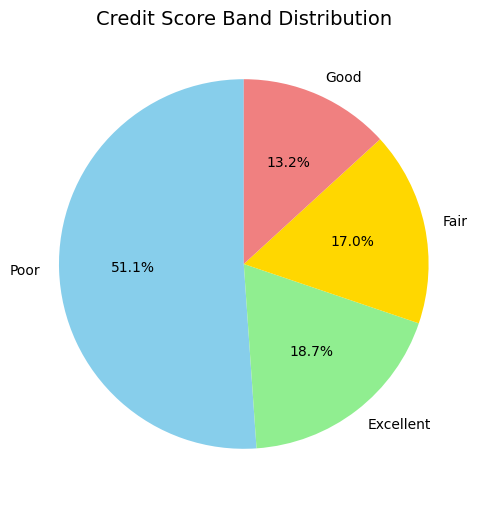

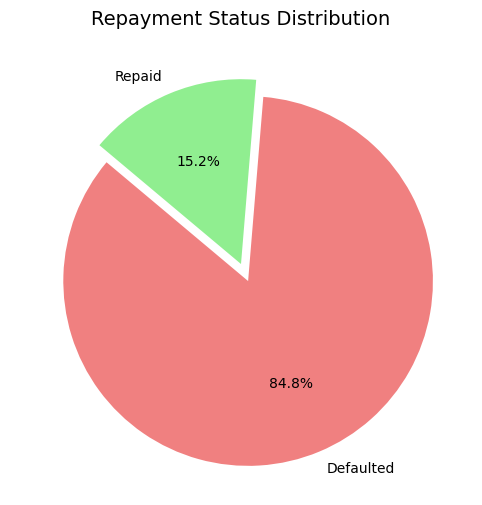

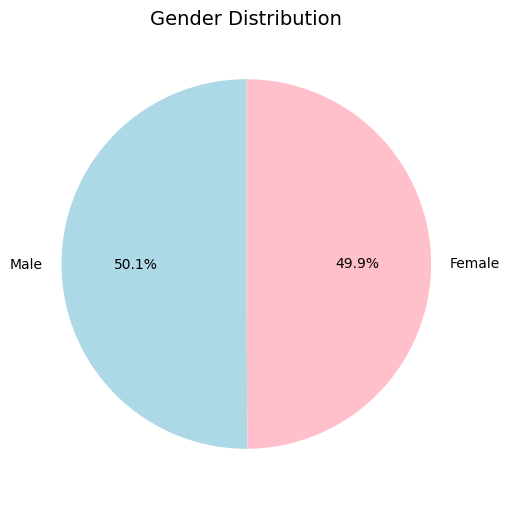

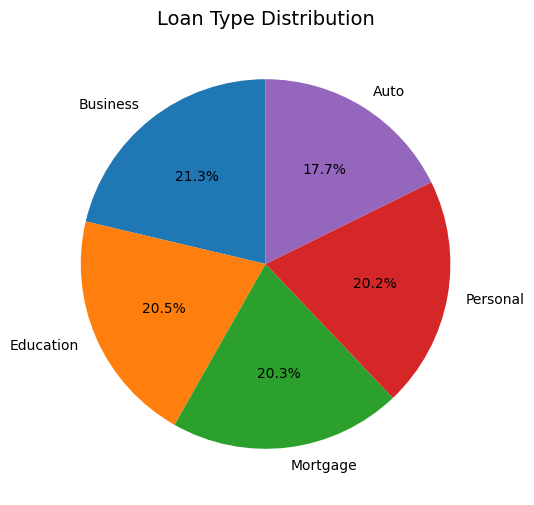

In [11]:
###Exploratory Data Analysis
##pie chart for Credit Score Band
df["Credit_Score_Band"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    figsize=(6, 6), 
    startangle=90, 
    labels=df["Credit_Score_Band"].value_counts().index,  
    colors=["skyblue", "lightgreen", "gold", "lightcoral"]  
)
plt.title("Credit Score Band Distribution", fontsize=14)
plt.ylabel("") 
plt.show()


## pie chart for Counting the number of occurrences for each repayment status
repayment_counts = df['Repayment_Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    repayment_counts,
    labels=['Defaulted', 'Repaid'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightcoral', 'lightgreen'],
    explode=[0.1, 0]
)
plt.title('Repayment Status Distribution', fontsize=14)
plt.ylabel("") 
plt.show()

##pie chart for Gender Distribution
df["Gender"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    figsize=(6, 6), 
    startangle=90, 
    colors=["lightblue", "pink"]
)
plt.title("Gender Distribution", fontsize=14)
plt.ylabel("")  
plt.show()

##pie chart for Loan Distribution
df["Loan_Type"].value_counts().plot.pie(
    autopct="%1.1f%%", 
    figsize=(6, 6), 
    startangle=90, 
)
plt.title("Loan Type Distribution",fontsize=14)
plt.ylabel("") 
plt.show()



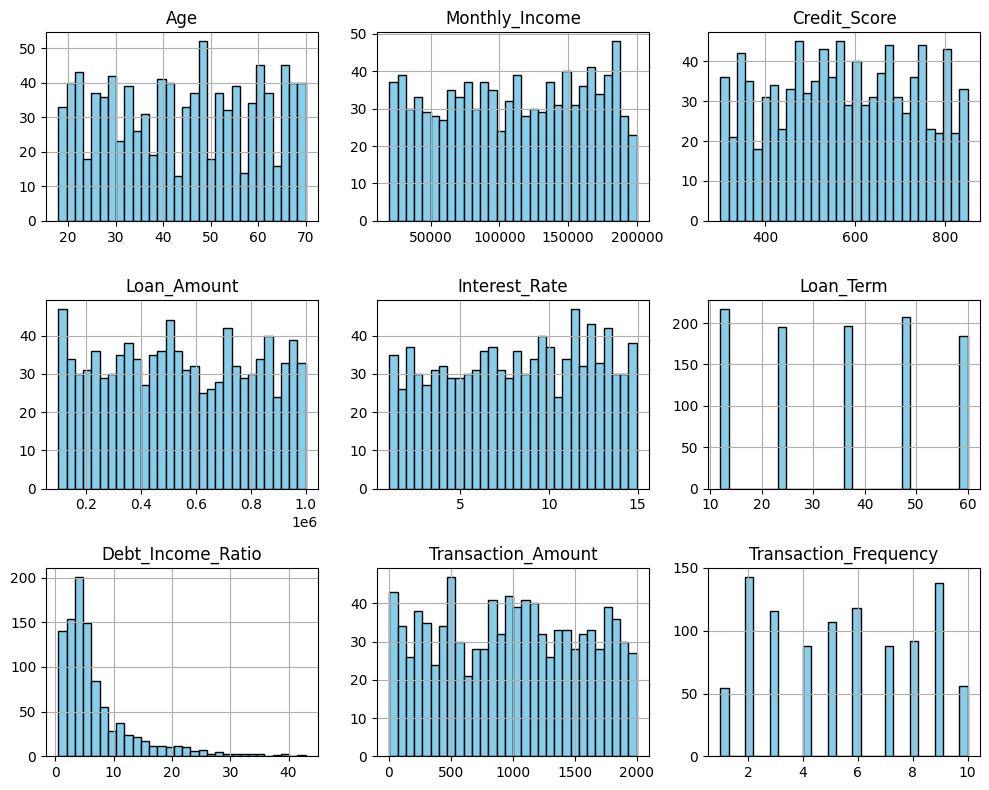

In [12]:
#Histogram
# Define numerical columns
num_columns = [
    "Age", "Monthly_Income", "Credit_Score", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Debt_Income_Ratio", 
    "Transaction_Amount", "Transaction_Frequency"
]

# Create histograms for numerical columns
df[num_columns].hist(figsize=(10, 8), bins=30, color="skyblue", edgecolor="black", layout=(3, 3))
plt.tight_layout()  
plt.show()

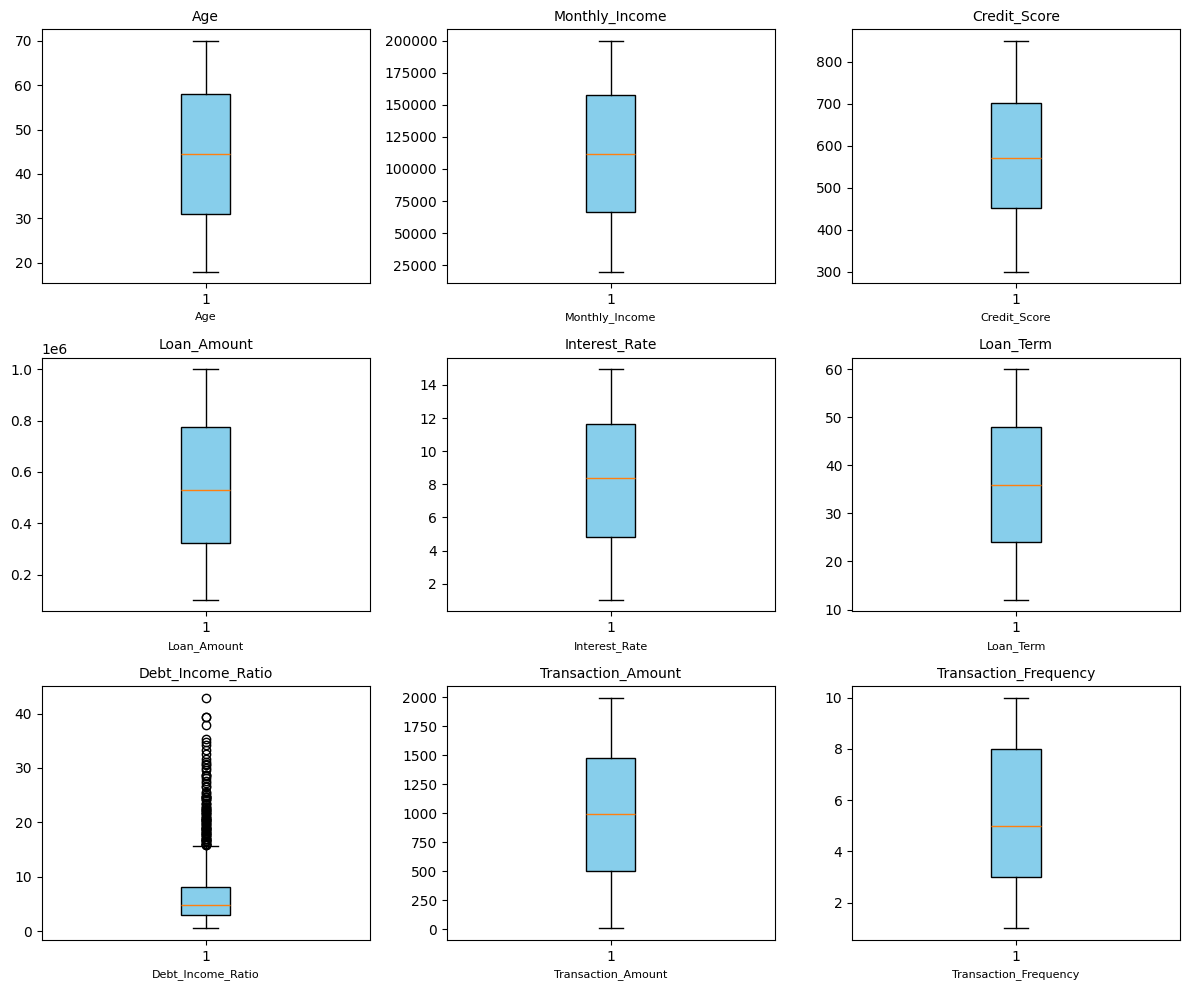

In [13]:
# Boxplot for outlier detection
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()   

for ax, column in zip(axes, num_columns):
    ax.boxplot(df[column], patch_artist=True, boxprops=dict(facecolor="skyblue"))
    ax.set_title(f"{column}", fontsize=10)
    ax.set_xlabel(column, fontsize=8)

plt.tight_layout()
plt.show()

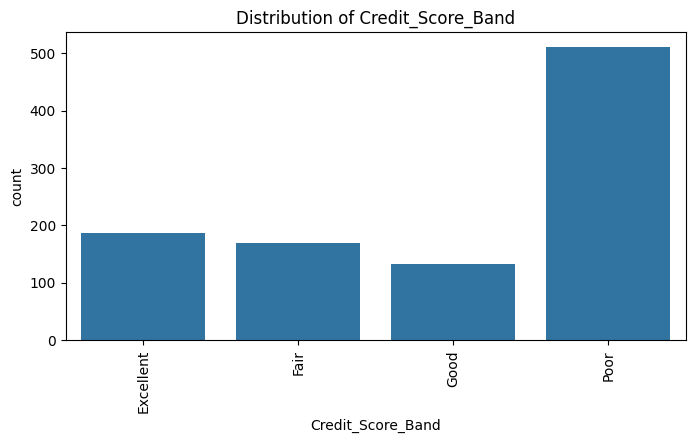

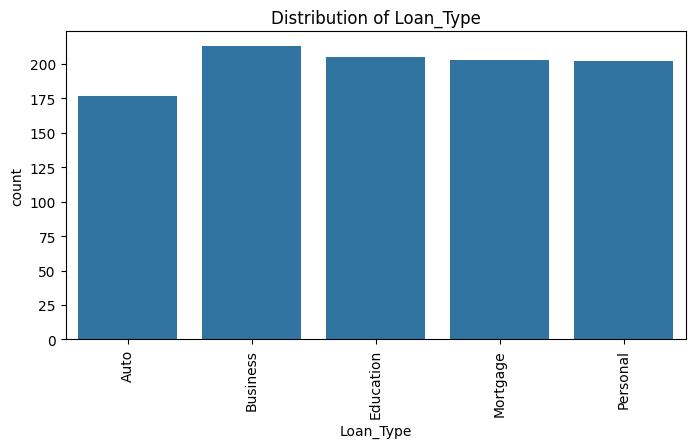

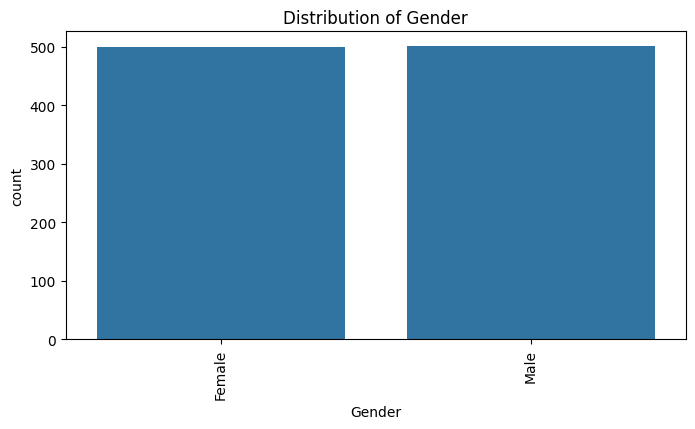

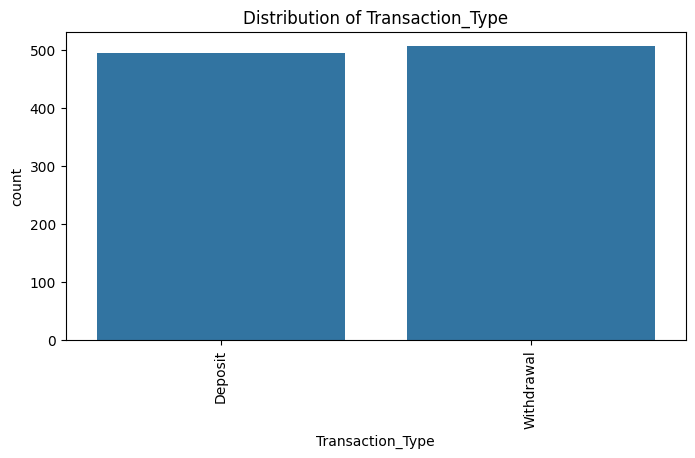

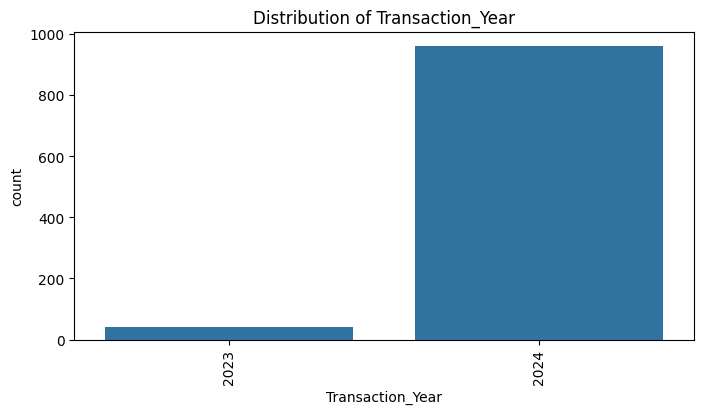

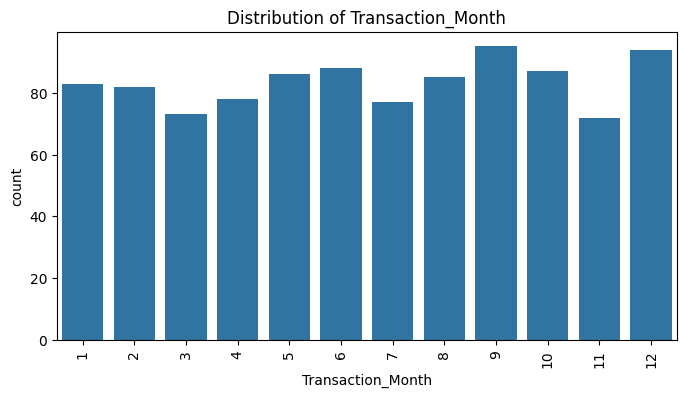

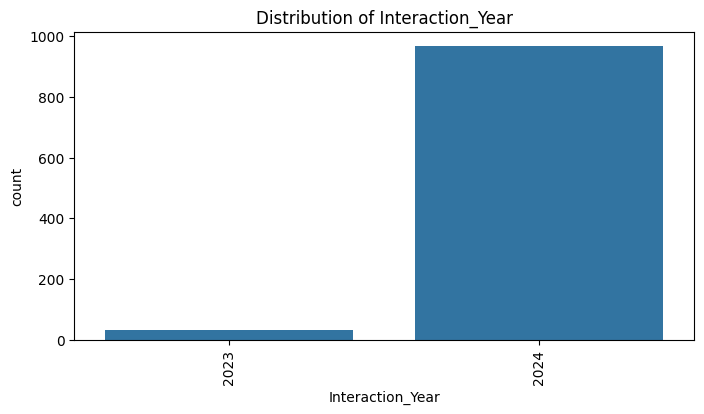

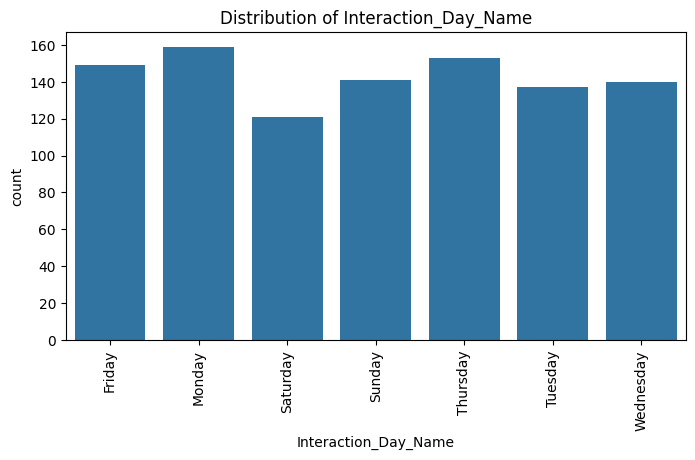

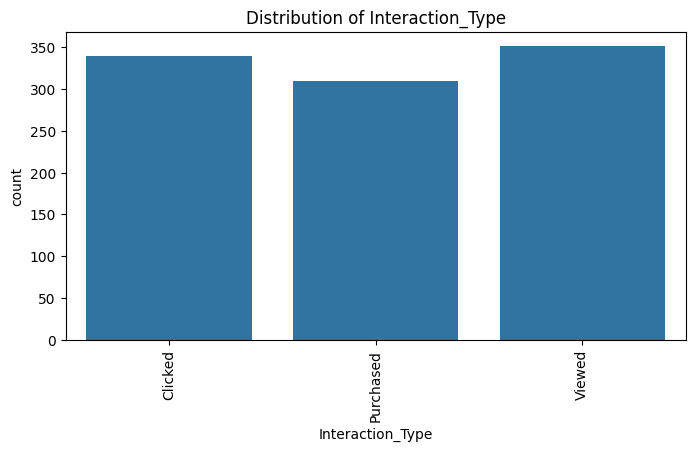

In [14]:
# Categorical variables(Count plot)
cat_columns = ["Credit_Score_Band", "Loan_Type", "Gender", 
               "Transaction_Type", "Transaction_Year", "Transaction_Month", "Interaction_Year", "Interaction_Day_Name", "Interaction_Type"]
for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sb.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

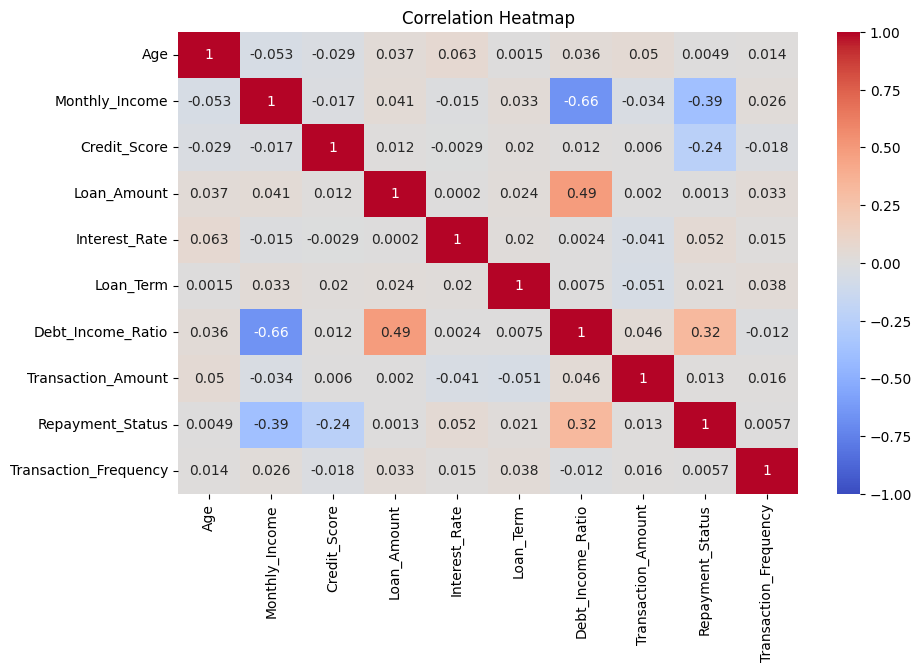

In [15]:
#correlation matrix(heat map)
num_col=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income_Ratio","Transaction_Amount","Repayment_Status","Transaction_Frequency"]
co_mat=df[num_col].corr()
plt.figure(figsize=(10, 6))
sb.heatmap(co_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

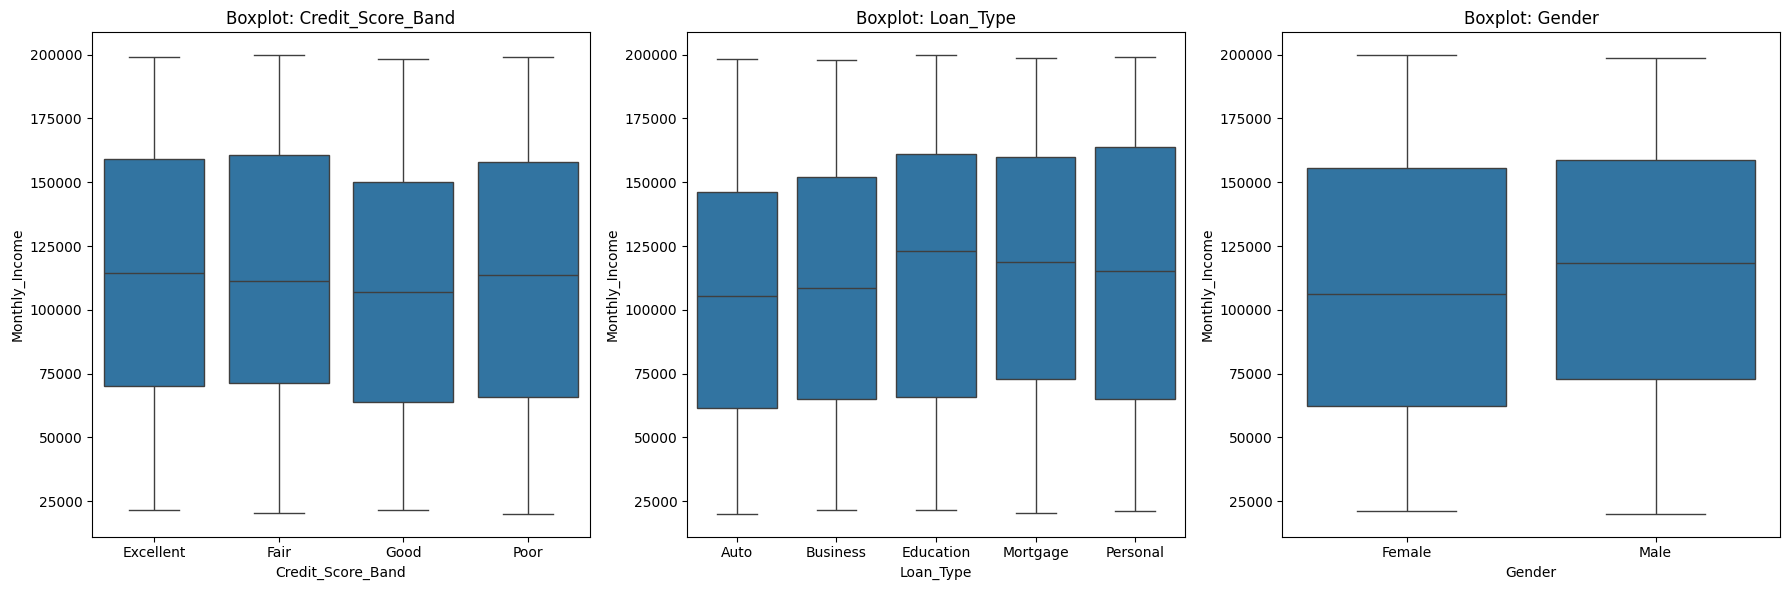

In [16]:
#Violinplot  the x=column and y=Monthly_Income
fig,axes=plt.subplots(1,3,figsize=(18,6))
axes=axes.flatten()
for ax,column in zip(axes,['Credit_Score_Band', 'Loan_Type', 'Gender']):
    sb.boxplot(x=column, y='Monthly_Income', data=df, ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

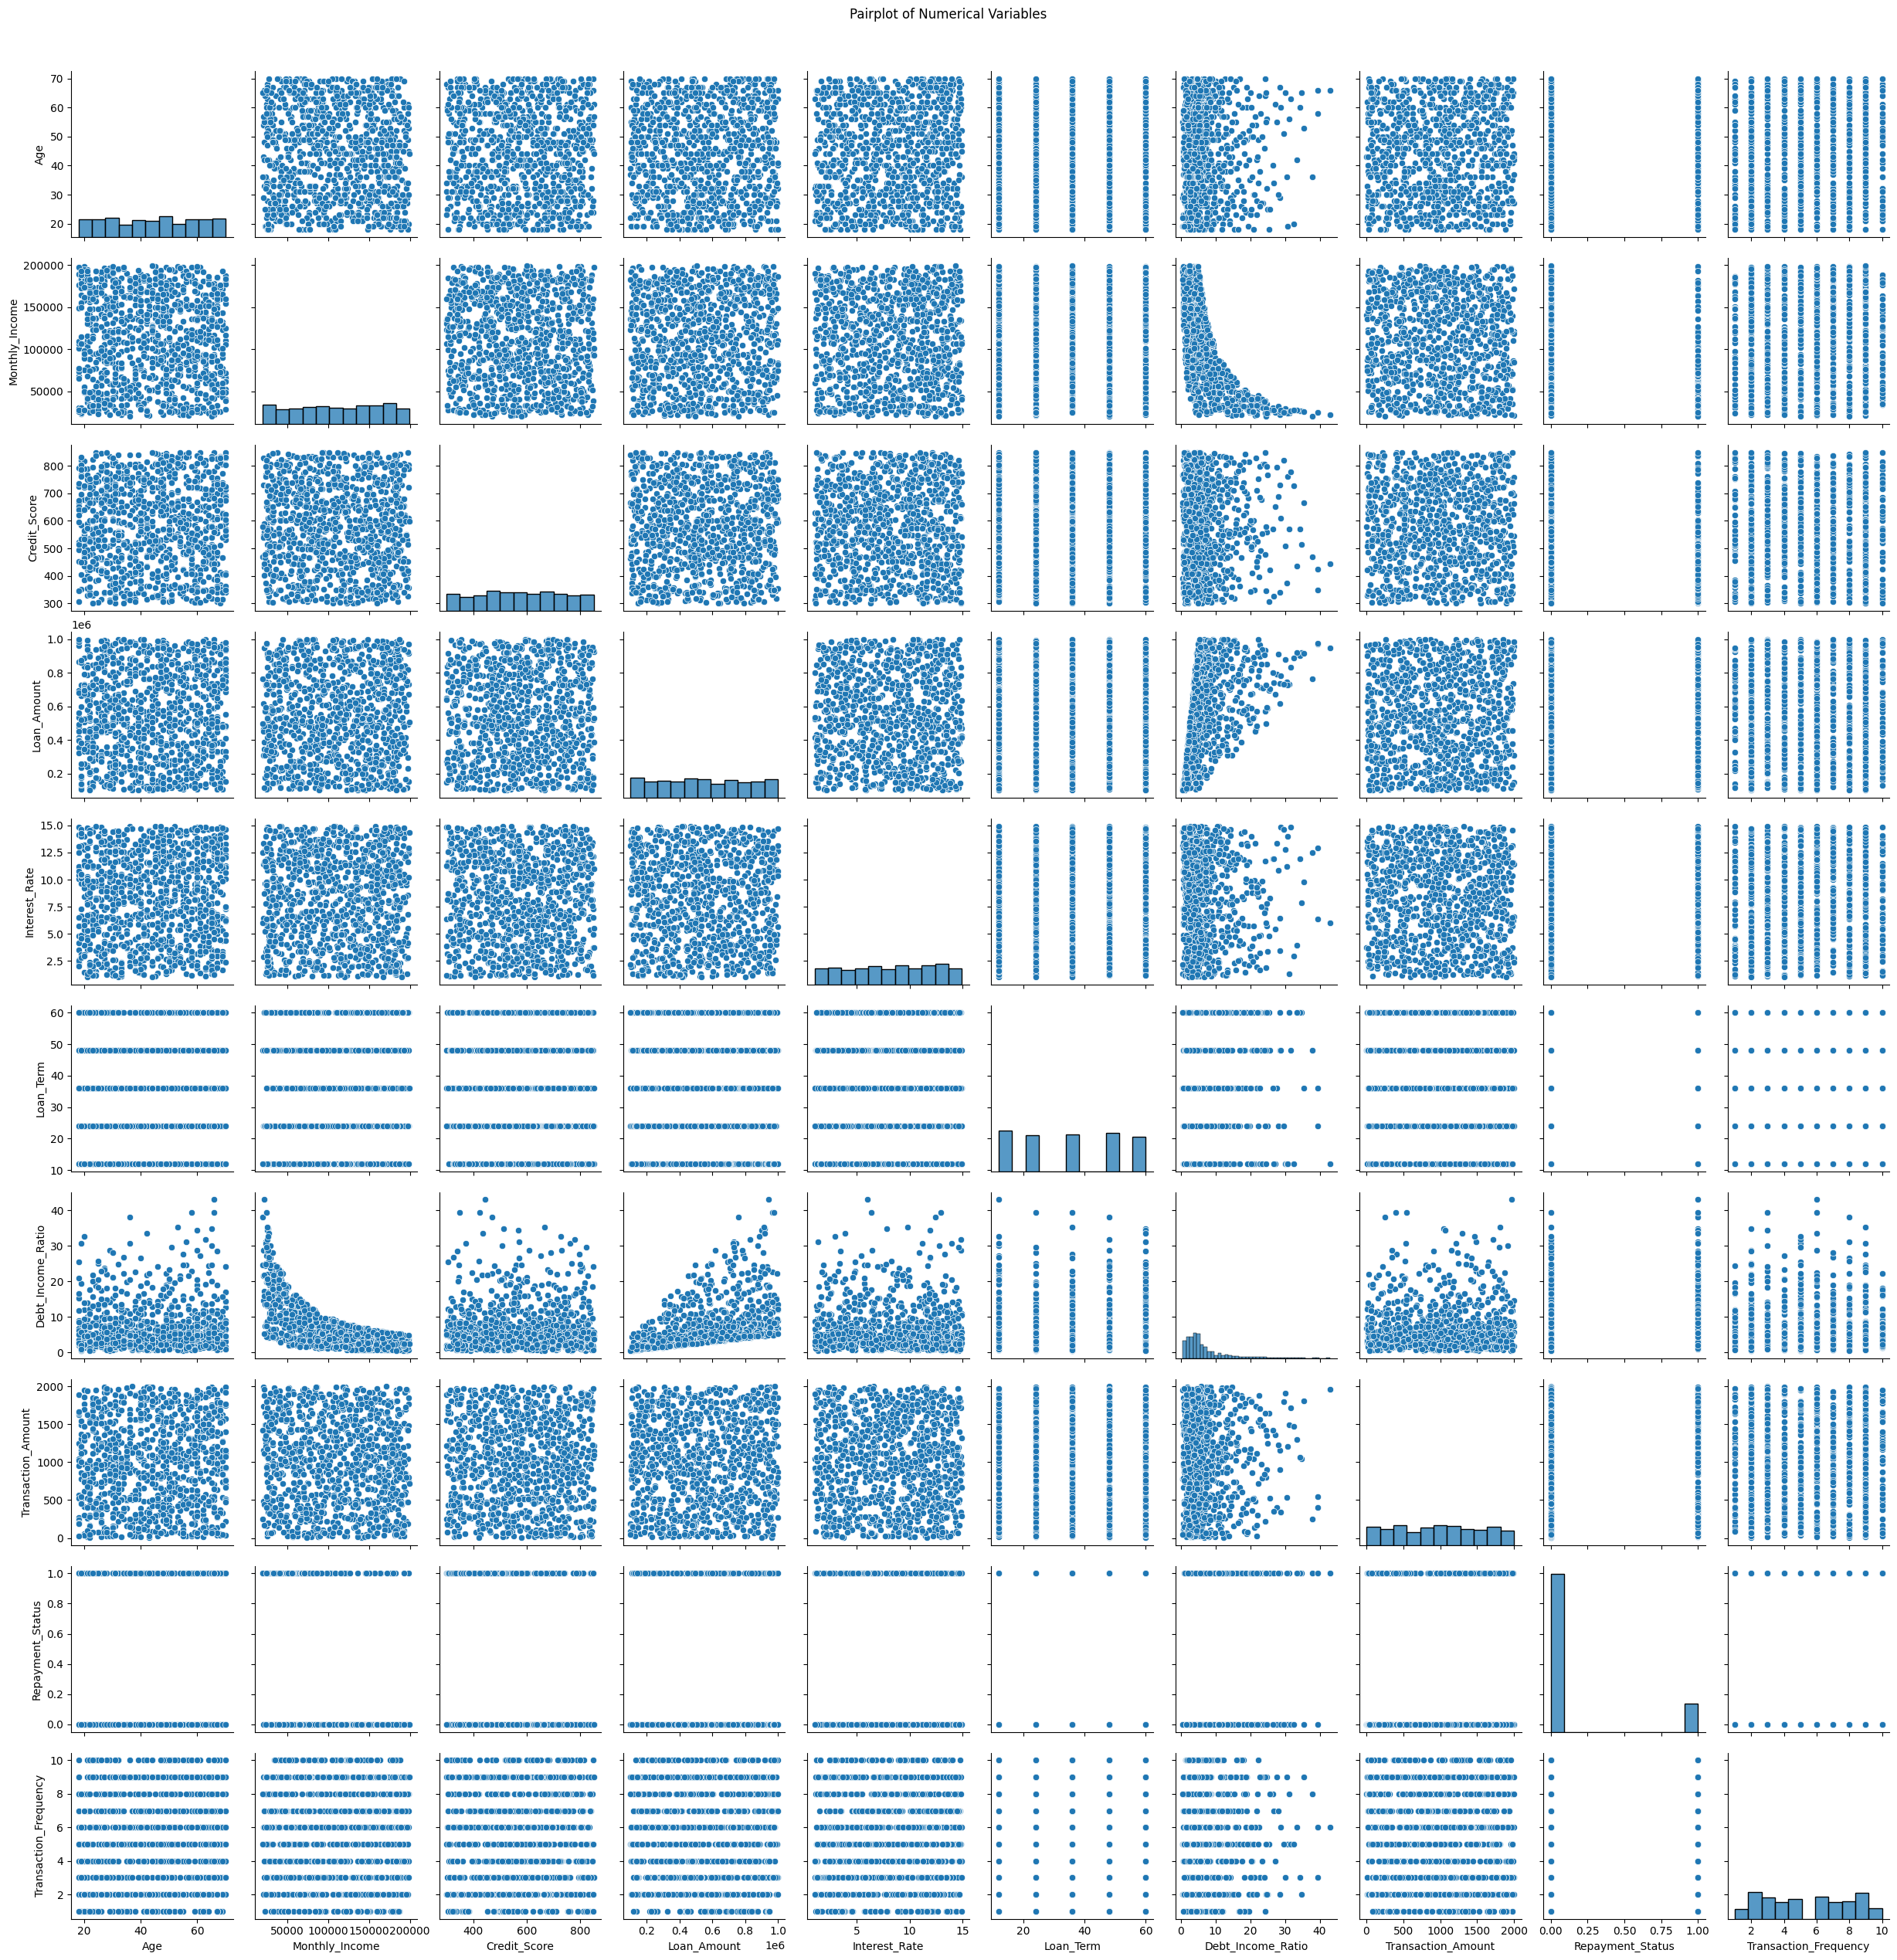

In [17]:
#Pairplot
sb.pairplot(df[num_col])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

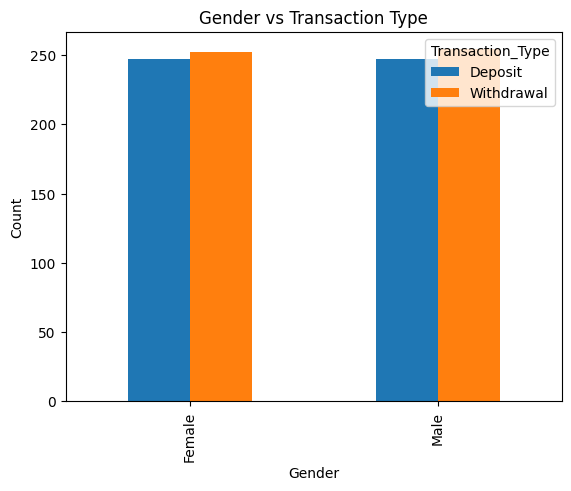

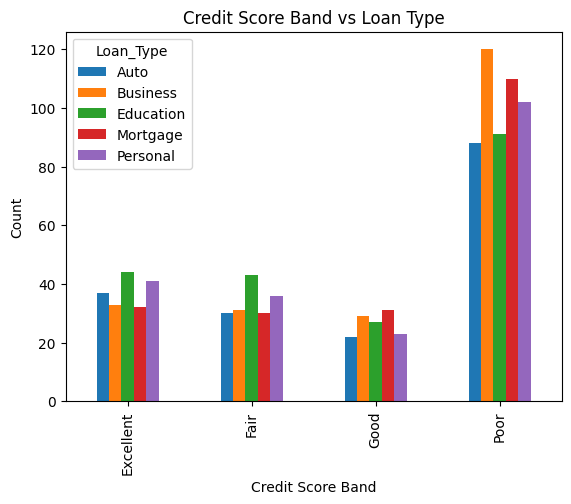

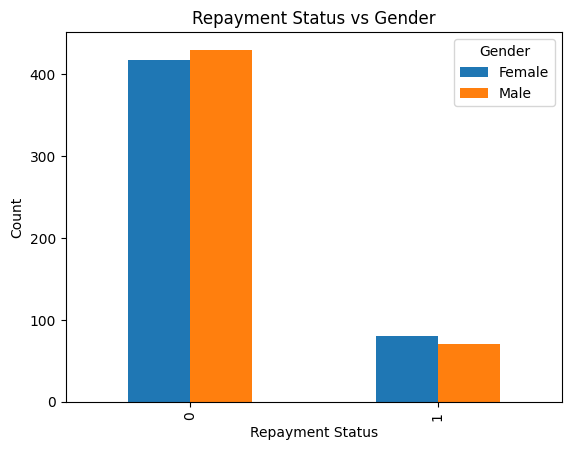

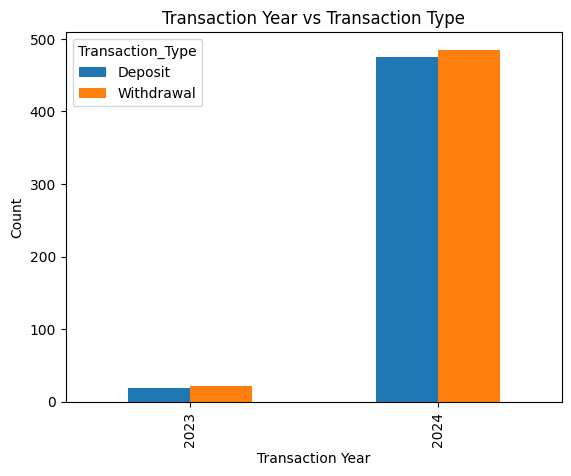

In [18]:
#Crosstab and stacked bar chart for categorical vs categorical
pd.crosstab(df['Gender'], df['Transaction_Type']).plot(kind='bar')
plt.title("Gender vs Transaction Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Crosstab for 'Credit_Score_Band' and 'Loan_Type'
pd.crosstab(df['Credit_Score_Band'], df['Loan_Type']).plot(kind='bar')
plt.title("Credit Score Band vs Loan Type")
plt.xlabel("Credit Score Band")
plt.ylabel("Count")
plt.show()

# Crosstab for 'Repayment_Status' and 'Gender'
pd.crosstab(df['Repayment_Status'], df['Gender']).plot(kind='bar')
plt.title("Repayment Status vs Gender")
plt.xlabel("Repayment Status")
plt.ylabel("Count")
plt.show()

# Crosstab for 'Transaction Year' and 'Transaction Type'
pd.crosstab(df['Transaction_Year'], df['Transaction_Type']).plot(kind='bar')
plt.title("Transaction Year vs Transaction Type")
plt.xlabel("Transaction Year")
plt.ylabel("Count")
plt.show()

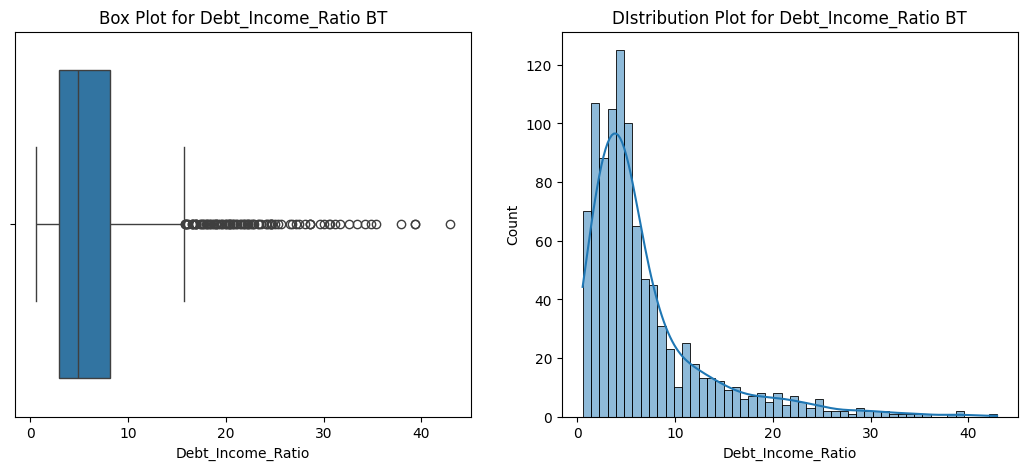

In [19]:
col_to_check_skew=["Debt_Income_Ratio"]
for i in col_to_check_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sb.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sb.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")

In [20]:
#function-to check skewness 
def check_skew(df,num_columns):
    skewness_i={}
    for i in num_columns:
        skewness=df[i].skew()
        if skewness>0.5:
            skew_type="Positively Skewed"
        elif skewness<-0.5:
            skew_type="Negatively skewed"
        else:
            skew_type="Symmetric"
        
        skewness_i[i]={
            "skewness_value":skewness,
            "skew Type":skew_type
        }
    return pd.DataFrame(skewness_i)

check_skew(df,num_columns)

Age Monthly_Income Credit_Score Loan_Amount  \
skewness_value  -0.012976      -0.066272    -0.011388    0.023297   
skew Type       Symmetric      Symmetric    Symmetric   Symmetric   

               Interest_Rate  Loan_Term  Debt_Income_Ratio Transaction_Amount  \
skewness_value     -0.096065   0.024397           2.178863          -0.005823   
skew Type          Symmetric  Symmetric  Positively Skewed          Symmetric   

               Transaction_Frequency  
skewness_value              0.049397  
skew Type                  Symmetric

In [21]:
#skewness treatment
df["Debt_To_Income_Log"]=np.log1p(df["Debt_Income_Ratio"])
df["Debt_To_Income_sqrt"]=np.sqrt(df["Debt_Income_Ratio"])
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income_Ratio"]+1)
print("log",df["Debt_To_Income_Log"].skew())
print("sqrt",df["Debt_To_Income_sqrt"].skew())
print("boxcox",df["Debt_To_Income_box_cox"].skew())

df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income_Ratio"]+1)
print("boxcox",df["Debt_To_Income_box_cox"].skew())

log 0.37679961597441664
sqrt 1.1063218796432601
boxcox 0.017805882514119527
boxcox 0.017805882514119527


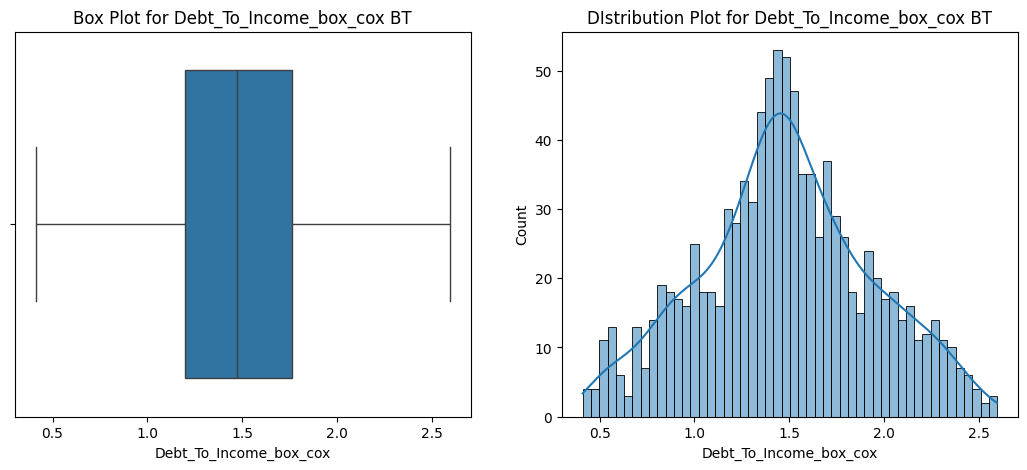

In [22]:
#Plotting after the treatment
treated_skew=["Debt_To_Income_box_cox"]
for i in treated_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sb.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sb.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")

In [23]:
df1=df.drop(columns=["Customer_Id"])

In [24]:
###Model Training and Evaluation
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])
X=X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

y_pred_lr=lr_sm.predict(X_test)

y_pred_lr_proba = lr_sm.predict_proba(X_test)[:, 1]

roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

accuracy_lr=accuracy_score(y_test, y_pred_lr)
precision_scr_lr=precision_score(y_test, y_pred_lr)
recall_scr_lr=recall_score(y_test, y_pred_lr)
f1_scr_lr=f1_score(y_test, y_pred_lr)
roc_auc_lr=roc_auc_lr
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1-Score:", f1_score(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)



Logistic Regression Accuracy: 0.7766666666666666
Logistic Regression Precision: 0.41836734693877553
Logistic Regression Recall: 0.803921568627451
Logistic Regression F1-Score: 0.5503355704697986
Logistic Regression ROC-AUC Score: 0.8259705488621153


In [25]:
#checking for imbalanced data
y_smote.value_counts()

Repayment_Status
0    599
1    599
Name: count, dtype: int64

In [26]:
#Hyperparameter Tuning for Logistion Regression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler,LabelEncoder

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])

X=X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter' : [100, 200, 300]
}

scoring = make_scorer(f1_score)
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_proba=best_model.predict_proba(X_test)[:,1]

accuracy_lr_at=accuracy_score(y_test, y_pred_best)
precision_scr_lr_at=precision_score(y_test, y_pred_best)
recall_scr_lr_at=recall_score(y_test, y_pred_best)
f1_score_lr_at=f1_score(y_test, y_pred_best)
roc_auc_lr_at=roc_auc_score(y_test, y_pred_best_proba)
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Logistic Regression Precision:", precision_score(y_test, y_pred_best))
print("Best Logistic Regression Recall:", recall_score(y_test, y_pred_best))
print("Best Logistic Regression F1-Score:", f1_score(y_test, y_pred_best))
print("Best Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_proba))

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8055758533293835
Best Logistic Regression Accuracy: 0.78
Best Logistic Regression Precision: 0.42424242424242425
Best Logistic Regression Recall: 0.8235294117647058
Best Logistic Regression F1-Score: 0.56
Best Logistic Regression ROC-AUC Score: 0.8403811323726278


In [27]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[38],
    "Monthly_Income":[80775.72],
    "Credit_Score":[808],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[344741.80],
    "Interest_Rate":[7.10],
    "Loan_Term":[12	],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[4.267889	]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [28]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[60],
    "Monthly_Income":[133065.00	],
    "Credit_Score":[842],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[302370.59],
    "Interest_Rate":[10.38	],
    "Loan_Term":[12	],
    "Loan_Type":["Auto"],
    "Debt_Income":[2.272353]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [29]:
df1.sample(2)

Age  Monthly_Income  Credit_Score Credit_Score_Band  Loan_Amount  \
302   24       128308.50           337              Poor    436508.62   
111   42       187287.93           549              Poor    321873.58   

     Interest_Rate  Loan_Term Loan_Type  Debt_Income_Ratio  Repayment_Status  \
302           9.43         12  Mortgage           3.402024                 0   
111           3.87         48  Personal           1.718603                 0   

     ... Product_Id       Product_Name  Interaction_Date Interaction_Year  \
302  ...       P038  Recurring Deposit        2024-08-28             2024   
111  ...       P034   Stock Investment        2024-11-26             2024   

    Interaction_Day_Name Interaction_Type Transaction_Frequency  \
302            Wednesday           Viewed                     6   
111              Tuesday          Clicked                     2   

    Debt_To_Income_Log Debt_To_Income_sqrt Debt_To_Income_box_cox  
302           1.482064            1.844458               1.270286  
111           1.000118            1.310955               0.900460  

[2 rows x 27 columns]

In [30]:
###Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

#encoding
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])
X = X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

y_pred_dt=dt_sm.predict(X_test)

y_pred_dt_proba= dt_sm.predict_proba(X_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)


accuracy_dt=accuracy_score(y_test, y_pred_dt)
precision_scr_dt=precision_score(y_test, y_pred_dt)
recall_scr_dt=recall_score(y_test, y_pred_dt)
f1_scr_dt=f1_score(y_test, y_pred_dt)
roc_auc_dt=roc_auc_dt
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt))
print("Decision Tree Classifier ROC-AUC Score:", roc_auc_dt)

Decision Tree Accuracy: 0.7833333333333333
Decision Tree Precision: 0.4027777777777778
Decision Tree Recall: 0.5686274509803921
Decision Tree F1-Score: 0.4715447154471545
Decision Tree Classifier ROC-AUC Score: 0.6979683439640916


In [31]:
#Hyperparameter Tunin for Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])

X=X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

param_grid_dt={
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid_dt,
                            scoring=scoring,
                            cv=5)

grid_search_dt.fit(x_smote,y_smote)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1-Score:", grid_search_dt.best_score_)

best_dt_model=grid_search_dt.best_estimator_

y_pred_best_dt=best_dt_model.predict(X_test)
y_pred_best_dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

accuracy_dt_at=accuracy_score(y_test, y_pred_best_dt)
precision_scr_dt_at=precision_score(y_test, y_pred_best_dt)
recall_scr_dt_at=recall_score(y_test, y_pred_best_dt)
f1_score_dt_at=f1_score(y_test, y_pred_best_dt)
roc_auc_dt_at=roc_auc_score(y_test, y_pred_best_dt_proba)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Decision Tree Precision:", precision_score(y_test, y_pred_best_dt))
print("Best Decision Tree Recall:", recall_score(y_test, y_pred_best_dt))
print("Best Decision Tree F1-Score:", f1_score(y_test, y_pred_best_dt))
print("Best Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_dt_proba))

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-Score: 0.8691825042327974
Best Decision Tree Accuracy: 0.79
Best Decision Tree Precision: 0.4117647058823529
Best Decision Tree Recall: 0.5490196078431373
Best Decision Tree F1-Score: 0.47058823529411764
Best Decision Tree ROC-AUC Score: 0.6941885187810064


In [32]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[38],
    "Monthly_Income":[80775.72],
    "Credit_Score":[808],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[344741.80],
    "Interest_Rate":[7.10],
    "Loan_Term":[12	],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[4.267889	]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = dt_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [33]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[60],
    "Monthly_Income":[133065.00	],
    "Credit_Score":[842],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[302370.59],
    "Interest_Rate":[10.38	],
    "Loan_Term":[12	],
    "Loan_Type":["Auto"],
    "Debt_Income":[2.272353]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = dt_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [ ]:
###Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])

X=X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

y_pred_rfr=rfr_sm.predict(X_test)

y_pred_rfr_proba = rfr_sm.predict_proba(X_test)[:, 1]

accuracy_rf=accuracy_score(y_test, y_pred_rfr)
precision_scr_rf=precision_score(y_test, y_pred_rfr)
recall_scr_rf=recall_score(y_test, y_pred_rfr)
f1_scr_rf=f1_score(y_test, y_pred_rfr)
roc_auc_rf=roc_auc_score(y_test, y_pred_rfr_proba)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfr))
print("Random Forest Precision:", precision_score(y_test, y_pred_rfr))
print("Random Forest Recall:", recall_score(y_test, y_pred_rfr))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rfr))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rfr_proba))

Random Forest Accuracy: 0.8433333333333334
Random Forest Precision: 0.54
Random Forest Recall: 0.5294117647058824
Random Forest F1-Score: 0.5346534653465347
Random Forest ROC-AUC: 0.8286872982124577


In [42]:
df1.sample(2)

Age  Monthly_Income  Credit_Score Credit_Score_Band  Loan_Amount  \
55   49       125635.58           474              Poor    814517.16   
38   60        88143.49           779         Excellent    103928.02   

    Interest_Rate  Loan_Term Loan_Type  Debt_Income_Ratio  Repayment_Status  \
55           4.39         36  Business           6.483173                 0   
38          13.71         12      Auto           1.179078                 0   

    ... Product_Id            Product_Name  Interaction_Date Interaction_Year  \
55  ...       P045            Pension Plan        2024-09-19             2024   
38  ...       P032  Education Savings Plan        2024-06-08             2024   

   Interaction_Day_Name Interaction_Type Transaction_Frequency  \
55             Thursday        Purchased                     6   
38             Saturday          Clicked                     9   

   Debt_To_Income_Log Debt_To_Income_sqrt Debt_To_Income_box_cox  
55           2.012657            2.546208               1.635722  
38           0.778902            1.085853               0.717525  

[2 rows x 27 columns]

In [43]:
#Hyperparameter Tuning For Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])
X=X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

param_grid_rf={
    "n_estimators": [100, 200, 300],
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                            param_grid=param_grid_rf,
                            scoring=scoring,
                            cv=5)

grid_search_rf.fit(x_smote,y_smote)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-Score:", grid_search_rf.best_score_)

best_rf_model=grid_search_rf.best_estimator_

y_pred_best_rf=best_rf_model.predict(X_test)
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_rf_at=accuracy_score(y_test, y_pred_best_rf)
precision_scr_rf_at=precision_score(y_test, y_pred_best_rf)
recall_scr_rf_at=recall_score(y_test, y_pred_best_rf)
f1_score_rf_at=f1_score(y_test, y_pred_best_rf)
roc_auc_rf_at=roc_auc_score(y_test, y_pred_best_rf_proba)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Precision:", precision_score(y_test, y_pred_best_rf))
print("Best Random Forest Recall:", recall_score(y_test, y_pred_best_rf))
print("Best Random Forest F1-Score:", f1_score(y_test, y_pred_best_rf))
print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf_proba))

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-Score: 0.9307143701482031
Best Random Forest Accuracy: 0.8533333333333334
Best Random Forest Precision: 0.5714285714285714
Best Random Forest Recall: 0.5490196078431373
Best Random Forest F1-Score: 0.56
Best Random Forest ROC-AUC Score: 0.8478226632018269


In [154]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[46],
    "Monthly_Income":[37656.02],
    "Credit_Score":[815],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[220099.82],
    "Interest_Rate":[9.73],
    "Loan_Term":[24],
    "Loan_Type":["Personal"],
    "Debt_Income_Ratio":[5.845010]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income_Ratio"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [155]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[39],
    "Monthly_Income":[183962.17],
    "Credit_Score":[388],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[482757.52],
    "Interest_Rate":[10.59],
    "Loan_Term":[48],
    "Loan_Type":["Personal"],
    "Debt_Income_Ratio":[2.624222]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income_Ratio"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [44]:
#Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])

X=X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

y_pred_gb=gb_sm.predict(X_test)

y_pred_prob_gbb = gb_sm.predict_proba(X_test)[:, 1]

accuracy_gb=accuracy_score(y_test, y_pred_gb)
precision_scr_gb=precision_score(y_test, y_pred_gb)
recall_scr_gb=recall_score(y_test, y_pred_gb)
f1_scr_gb=f1_score(y_test, y_pred_gb)
roc_auc_gb=roc_auc_score(y_test, y_pred_prob_gbb)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred_gb))
print("Gradient Boosting Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting F1-Score:", f1_score(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, y_pred_prob_gbb))

Gradient Boosting Accuracy: 0.8366666666666667
Gradient Boosting Precision: 0.5185185185185185
Gradient Boosting Recall: 0.5490196078431373
Gradient Boosting F1-Score: 0.5333333333333333
Gradient Boosting ROC-AUC: 0.8223482163949917


In [45]:
#Hyperparameter Tuning for Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income_Ratio"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income_Ratio"])

X=X.drop(columns=["Debt_Income_Ratio"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

param_grid_gb={
    "max_depth":[2,3,4],
    "learning_rate":[0.05,0.1],
    "n_estimators":[100,200],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5]
}

scoring=make_scorer(f1_score)

grid_search_gb=GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                            param_grid=param_grid_gb,
                            scoring=scoring,
                            cv=5)

grid_search_gb.fit(x_smote,y_smote)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best F1-Score:", grid_search_gb.best_score_)

best_gb_model=grid_search_gb.best_estimator_

y_pred_best_gb=best_gb_model.predict(X_test)
y_pred_best_gb_proba = best_gb_model.predict_proba(X_test)[:, 1]

accuracy_gb_at=accuracy_score(y_test, y_pred_best_gb)
precision_scr_gb_at=precision_score(y_test, y_pred_best_gb)
recall_scr_gb_at=recall_score(y_test, y_pred_best_gb)
f1_score_gb_at=f1_score(y_test, y_pred_best_gb)
roc_auc_gb_at=roc_auc_score(y_test, y_pred_best_gb_proba)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Precision:", precision_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Recall:", recall_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting F1-Score:", f1_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_gb_proba))

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best F1-Score: 0.9243388410508494
Best Gradient Boosting Accuracy: 0.8466666666666667
Best Gradient Boosting Precision: 0.5581395348837209
Best Gradient Boosting Recall: 0.47058823529411764
Best Gradient Boosting F1-Score: 0.5106382978723404
Best Gradient Boosting ROC-AUC Score: 0.791479644066462


In [156]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[46],
    "Monthly_Income":[37656.02],
    "Credit_Score":[815],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[220099.82],
    "Interest_Rate":[9.73],
    "Loan_Term":[24],
    "Loan_Type":["Personal"],
    "Debt_Income_Ratio":[5.845010]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income_Ratio"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = gb_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [157]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[39],
    "Monthly_Income":[183962.17],
    "Credit_Score":[388],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[482757.52],
    "Interest_Rate":[10.59],
    "Loan_Term":[48],
    "Loan_Type":["Personal"],
    "Debt_Income_Ratio":[2.624222]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income_Ratio"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score", 
    "Credit_Score_Band", "Loan_Amount", 
    "Interest_Rate", "Loan_Term", "Loan_Type", 
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = gb_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [158]:
##Model Accuracy Comparison: Before and After Tuning
models=pd.DataFrame({
    "Model":["Logistic Regression","Decision TreeClassifier","Random Forest Classifier","Gradient Boosting Classifier"],

    "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_gb],

    "Accuracy after Tuning":[accuracy_lr_at,accuracy_dt_at,accuracy_rf_at,accuracy_gb_at]
})
models

Model  Accuracy  Accuracy after Tuning
0           Logistic Regression  0.776667               0.780000
1       Decision TreeClassifier  0.783333               0.790000
2      Random Forest Classifier  0.843333               0.853333
3  Gradient Boosting Classifier  0.836667               0.846667

In [159]:
#saving the Random Forest Classifier model using pickle, as it shows the highest accuracy
import pickle

with open("rf_cl.pkl","wb") as f:
    pickle.dump(rfr_sm,f)

with open("l_e_credict.pkl","wb") as f:
    pickle.dump(le_credict,f)

with open("l_e_loan.pkl","wb") as f:
    pickle.dump(le_loan,f)

with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

In [ ]:
###Unsupervised Learning

Silhouette Score for kmeans: 0.38475064863939884
Davies-Bouldin Index for kmeans: 0.8666375868424699


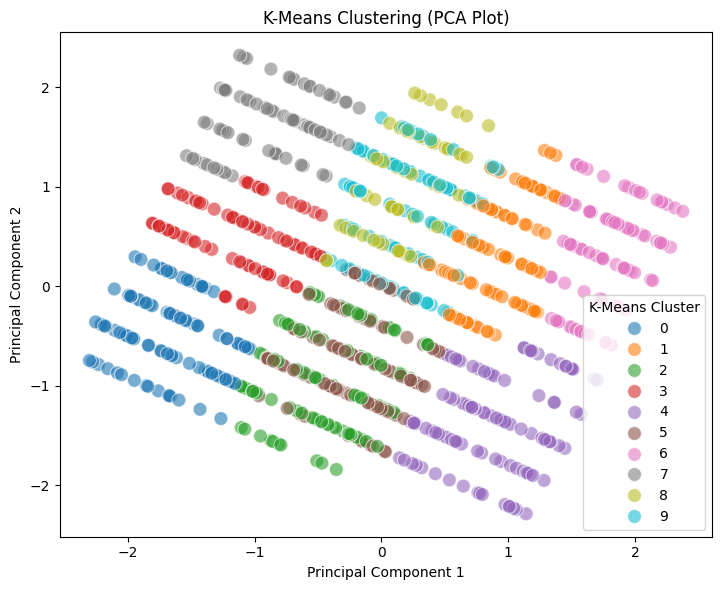

<Axes: xlabel='KMeans_Cluster', ylabel='count'>

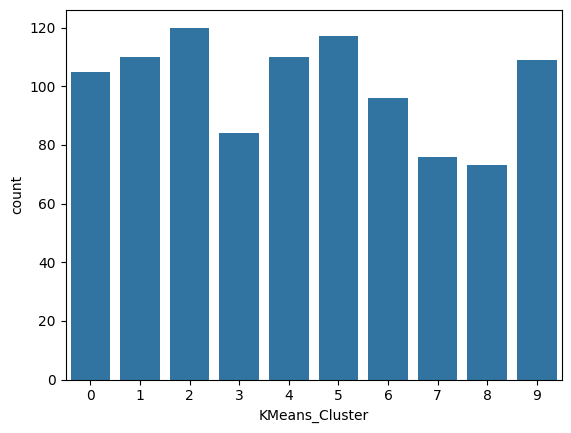

In [50]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pickle

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_kmean = StandardScaler()
f_s = scaler_kmean.fit_transform(feature)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
k_means_clusters = kmeans.fit_predict(f_s)
df['KMeans_Cluster'] = k_means_clusters

silhouette_avg_kmeans = silhouette_score(f_s, k_means_clusters)
dbi_kmeans = davies_bouldin_score(f_s, k_means_clusters)

print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="KMeans_Cluster", data=df)

In [51]:
# Save models
with open('scaler_kmean.pkl', 'wb') as f:
    pickle.dump(scaler_kmean, f)
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('l_e_t_t.pkl', 'wb') as f:
    pickle.dump(l_e_t_t, f)

def predict_cluster(transaction_amount, transaction_frequency, transaction_type, scaler, kmeans, l_e_t_t):
    encoded_transaction_type = l_e_t_t.transform([transaction_type])[0]

    input_data = np.array([[transaction_amount, transaction_frequency, encoded_transaction_type]])

    scaled_input_data = scaler_kmean.transform(input_data)
    
    cluster = kmeans.predict(scaled_input_data)
    
    return cluster[0]

Transaction_Amount = 145.79
Transaction_Frequency = 7
Transaction_Type = "Withdrawal"
predicted_cluster = predict_cluster(Transaction_Amount, Transaction_Frequency, Transaction_Type, scaler_kmean, kmeans, l_e_t_t)
print(f"The input data belongs to Cluster {predicted_cluster}")

The input data belongs to Cluster 8


In [52]:
df[["Customer_Id","Transaction_Frequency","Transaction_Amount","Transaction_Type","KMeans_Cluster"]]

Customer_Id  Transaction_Frequency  Transaction_Amount Transaction_Type  \
0          C074                      7              569.38       Withdrawal   
1          C090                      3              223.12       Withdrawal   
2          C068                      9             1305.88       Withdrawal   
3          C031                      5              840.96          Deposit   
4           C08                      8               45.91          Deposit   
..          ...                    ...                 ...              ...   
995        C057                      8               47.26       Withdrawal   
996        C012                      4              167.93          Deposit   
997        C055                      6             1765.34          Deposit   
998        C071                      2             1602.71          Deposit   
999        C047                      5             1757.00       Withdrawal   

     KMeans_Cluster  
0                 8  
1                 5  
2                 6  
3                 3  
4                 7  
..              ...  
995               8  
996               0  
997               9  
998               2  
999               4  

[1000 rows x 5 columns]

Silhouette Score for dbscan: 0.3528114115492555
Davies-Bouldin Index for dbscan: 1.3200227180070812


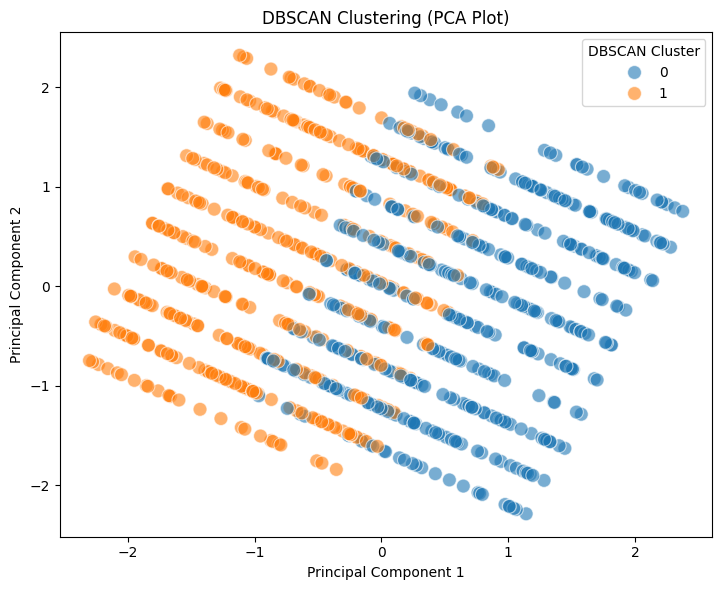

<Axes: xlabel='DBSCAN_Cluster', ylabel='count'>

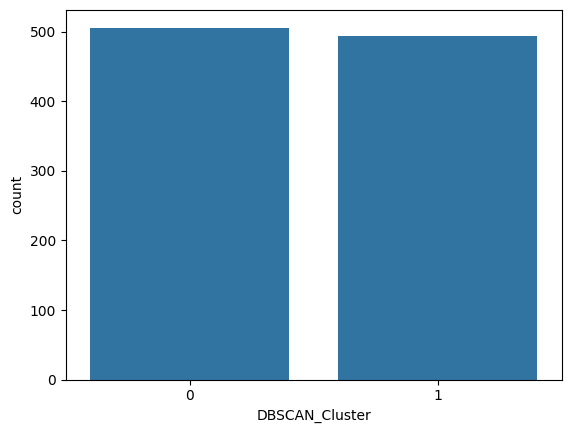

In [53]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_dbscan = StandardScaler()
f_s = scaler_dbscan.fit_transform(feature)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(f_s)
df['DBSCAN_Cluster'] = dbscan_clusters

if len(set(dbscan_clusters))>1:
    silhouette_avg_dbscan = silhouette_score(f_s, dbscan_clusters)
    print(f'Silhouette Score for dbscan: {silhouette_avg_dbscan}')
    dbi_dbscan = davies_bouldin_score(f_s, dbscan_clusters)
    print(f'Davies-Bouldin Index for dbscan: {dbi_dbscan}')
else:
    print("Only 1 Cluster found")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('DBSCAN Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="DBSCAN_Cluster", data=df)

In [126]:
import pandas as pd

# Load the dataframe from a CSV file 
df = pd.read_csv('D:/Final_project/simplified_dataset.csv')

In [127]:
df

Customer_Id  Age  Monthly_Income  Credit_Score Credit_Score_Band  \
0          C074   37       181981.92           740         Excellent   
1          C090   49        73119.27           363              Poor   
2          C068   36       115871.54           472              Poor   
3          C031   29        58724.38           662              Fair   
4           C08   39        87561.13           609              Fair   
..          ...  ...             ...           ...               ...   
995        C057   22       183137.63           665              Fair   
996        C012   69       193218.36           340              Poor   
997        C055   70       116834.72           348              Poor   
998        C071   43        65688.05           664              Fair   
999        C047   40       173075.14           561              Poor   

     Loan_Amount  Interest_Rate  Loan_Term  Loan_Type  Debt_Income_Ratio  ...  \
0      595211.63           3.46         24       Auto           3.270718  ...   
1      791138.45           3.88         12  Education          10.819835  ...   
2      602767.48           2.35         24   Mortgage           5.202032  ...   
3      263215.83           4.10         12       Auto           4.482224  ...   
4      662525.89           6.36         36  Education           7.566438  ...   
..           ...            ...        ...        ...                ...  ...   
995    101160.59           2.15         60   Mortgage           0.552375  ...   
996    476178.63          14.74         48   Mortgage           2.464459  ...   
997    978457.41           4.97         12   Business           8.374714  ...   
998    110451.95          11.58         12   Mortgage           1.681462  ...   
999    290349.99           2.75         48   Business           1.677595  ...   

     Transaction_Date Transaction_Year Transaction_Month  Product_Id  \
0          2024-04-04             2024                 4        P034   
1          2024-02-16             2024                 2        P049   
2          2024-08-28             2024                 8        P021   
3          2024-02-07             2024                 2        P023   
4          2024-12-13             2024                12        P035   
..                ...              ...               ...         ...   
995        2024-04-15             2024                 4        P039   
996        2024-06-20             2024                 6        P047   
997        2024-05-28             2024                 5        P017   
998        2024-09-07             2024                 9        P047   
999        2024-08-08             2024                 8        P047   

               Product_Name Interaction_Date  Interaction_Year  \
0          Stock Investment       2024-05-31              2024   
1            Auto Insurance       2024-05-18              2024   
2               Cash Credit       2024-12-07              2024   
3            Long-Term Loan       2024-11-23              2024   
4    Real Estate Investment       2024-10-16              2024   
..                      ...              ...               ...   
995   Loan Against Property       2024-06-04              2024   
996      Healthcare Savings       2024-04-13              2024   
997    Business Credit Line       2024-02-18              2024   
998      Healthcare Savings       2024-11-04              2024   
999      Healthcare Savings       2023-12-24              2023   

     Interaction_Day_Name Interaction_Type Transaction_Frequency  
0                  Friday           Viewed                     7  
1                Saturday           Viewed                     3  
2                Saturday          Clicked                     9  
3                Saturday           Viewed                     5  
4               Wednesday          Clicked                     8  
..                    ...              ...                   ...  
995               Tuesday          Clic

In [128]:
#Product Recommendations
#K-Nearest Neighbors Algorithm

In [129]:
#KNN BASIC 
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)


model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
model.fit(trainset)


def recommend_products(customer_id, model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'C09' 
recommended_products = recommend_products(Customer_Id, model, df, product_mapping, n=5)
print(recommended_products)

predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
  Product_Id              Product_Name
0        P02  Premium Checking Account
1       P019          Home Equity Loan
2       P046        Financial Planning
3       P014             Personal Loan
4        P05      Standard Credit Card


In [130]:
with open("knn_pro.pkl","wb") as f:
    pickle.dump(model,f)

In [131]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()

In [132]:
precision_at_k(predictions)

0.6080756013745705

In [133]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2  
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall

In [134]:
recall_at_k(predictions)

0.6080756013745705

In [135]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2 
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions

In [136]:
mean_average_precision(predictions)

0.027359570497112677

In [137]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']
        
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))
        
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))
        
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()

In [138]:
ndcg_at_k(predictions)

0.9139371716168455

In [ ]:
#hyperparameter tuning
# Imports
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split, GridSearchCV

# Product Mapping Dictionary
product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}

interaction_type_mapping = {'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

# Data Preprocessing
df["Product_Name"] = df["Product_Id"].map(product_mapping)
df["Interaction_Type"] = df["Interaction_Type"].map(interaction_type_mapping)

# Dataset and Reader
reader = Reader(rating_scale=(1, 3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)

# Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.25)

# Define parameter grid for hyperparameter tuning
param_grid = {
    "k": [5, 10, 15],
    "sim_options": {
        "name": ["cosine", "msd", "pearson"],
        "user_based": [True, False]
    }
}

# Initialize GridSearchCV
gs = GridSearchCV(KNNBasic, param_grid, measures=["rmse"], cv=3)

# Fit the model to the data
gs.fit(data)

# Get the best model from GridSearchCV
best_knn_model = gs.best_estimator["rmse"]

# Fit the best model to the trainset
best_knn_model.fit(trainset)

# Print best parameters
print("Best parameters found by GridSearchCV:")
print(gs.best_params["rmse"])



Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar